| Name              | Affiliation           | IEEE Member | SSCS Member |
| :---------------- | :-------------------: | :---------: |------------:|
| Asma Moshin       | Heidelberg University | No          | No          |
| Kevin Klein       | Heidelberg University | No          | No          |
| Marcel Jung       | Heidelberg University | No          | No          | 

# Educational eFPGA Project

## Introduction

This project focuses on the design and implementation of an educational eFPGA (embedded Field-Programmable Gate Array) using the [FABulous](https://fabulous.readthedocs.io/en/latest/) framework. For the backend design, the [OpenLane](https://efabless.com/openlane) toolchain was used.

Field-Programmable Gate Arrays (FPGAs) are essential in modern digital systems, because they enable reconfigurable logic for diverse applications such as signal processing, machine learning, and prototyping custom digital designs. However, commercial FPGA architectures are often complex and proprietary, creating a steep learning curve for beginners and limiting access to details about their internal structure. FPGAs designed with FABulous address this gap by providing a simplified, open-source FPGA platform that is entirely customizable and transparent, making it ideal for educational purposes.

**Key points of the project include:**

- Modular design with tiles (LUT, (RAM)-I/O, termination) for ease of understanding and easy customization.
- A transparent implementation which allows learners to explore the internal details of an FPGA.
- An easily extendable and adaptable desing using open tools such as OpenLane and the Sky130 PDK.
- Emphasizing the understanding of FPGA interconnects, which is a complex component of an FPGA.

## Design Overview

The FPGA design, named eFPGA_top, features:

- A modular structure composed of logic tiles (LUT4ABs), memory connection tiles (RAM_IO), I/O tiles (W_IO) and termination tiles (N_term/S_term).
- A fully customizable interconnect and routing network.
- Compatibility with the open-source Sky130 process node for physical implementation.

The design is built on a grid of configurable tiles:

- **LUT4AB Tile:** Implements six 4-input Look-Up tables, the fundamental building blocks for digital logic.
- **RAM_IO Tile:** Connects the fabric to the RAM.
- **I/O Tiles:** Provides an interface to the external environment.
- **Termination Tiles:** Terminate and reflect the wires back into the fabric. Can also be modified to be used as additional I/Os, depending on the use case.

FABulous FPGAs include a routing network for interconnecting tiles:

- **Directional Routing:** Dedicated wires for north, south, east, and west directions.
- **Switch Matrices:** Enable dynamic routing through configuration bits.

The eFPGA uses a **frame-based** configuration mechanism.


## Design Specifications

##### **a. General Parameters**
| Parameter                | Value                    | Description                                      |
|--------------------------|--------------------------|--------------------------------------------------|
| Die Area                 | 2920 μm x 1854 μm       | Overall chip size                                |
| Core Utilization         | 30%                     | Target utilization for placement                |
| Clock Period             | 40 ns (25 MHz)          | Operating frequency                              |

###### **b. Tile Information**
| Tile Type       | Function                           | Count      |
|------------------|------------------------------------|------------|
| LUT4AB          | Contains six 4-input Look-Up tables              | 48   |
| RAM_IO          | Memory interface           | 6   |
| N_term/S_term   | Termination of the fabric in the north and south direction | 9 (1 per column, except for W_IO) |
| W_IO            | Tri-stated, bi-directional connection to external I/O pins, two connections per tile | 6 |

###### **c. Pin and I/O Information**
| Pin Name         | Type          | Description                      |
|------------------|---------------|-----------------------------------|
| CLK              | Clock Input   | Primary clock signal             |
| vccd1/vssd1      | Power Pins    | Used to connect the eFPGA to power          |
| resetn           | Reset         | Resets the fabric |
| Rx               | Fabric pin    | Receive the bitstream over UART |
| ReceiveLED       | Fabric pin    | Signalize the reception of the bitstream |
| s_clk            | Fabric pin    | Clock for a custom bitbang protocol |
| s_data           | Fabric pin    | Data for a custom bitbang protocol |
| I_top, O_top, T_top| User pin      | Bidirectional user logic pins, can be driven by a user design and be used in tri-state mode  |

## Install Dependencies

It is required to install docker: <br>
https://docs.docker.com/engine/install/

git is also needed.

**We will use the following Docker image with openlane:** <br>
efabless/openlane:3876562d27af3f6825a823941b1cab36f7eb6dc3-amd64

In [9]:
! pip install gdstk
! pip install svgutils
! pip install matplotlib
! pip install pygments
! pip install click 
! pip install PyYAML

## Getting started

First we need to copy our FPGA design into the openlane directory
and also copy all verilog files. <br>
Our FPGA design can be found in: https://github.com/cevinclein/eFPGA.git

For the flow we will use: https://github.com/efabless/caravel_user_project/tree/main

In [10]:
! git clone --depth 1 https://github.com/efabless/caravel_user_project.git
! git clone https://github.com/cevinclein/eFPGA.git

Cloning into 'caravel_user_project'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 254 (delta 81), reused 144 (delta 38), pack-reused 0 (from 0)
Receiving objects: 100% (254/254), 35.47 MiB | 1.47 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Updating files: 100% (212/212), done.
Cloning into 'eFPGA'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 191 (delta 55), reused 179 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (191/191), 5.30 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [11]:
! cp -r ./eFPGA/eFPGA_top ./caravel_user_project/openlane/
! cp -r ./eFPGA/verilog/rtl/* ./caravel_user_project/verilog/rtl/

In [12]:
! cd ./caravel_user_project && make setup

if [ -d "/home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel" ]; then\
	echo "Deleting exisiting /home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel" && \
	rm -rf /home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel && sleep 2;\
fi
echo "Installing caravel-lite.."
Installing caravel-lite..
git clone -b 2024.09.12-1 https://github.com/efabless/caravel-lite /home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel --depth=1
Cloning into '/home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 442 (delta 135), reused 300 (delta 82), pack-reused 0 (from 0)
Receiving objects: 100% (442/442), 192.35 MiB | 2.89 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Note: switching to '5593d992bbeb5608b7524bc279d91237371612f1'.

You are in 'detached HEAD' state. You can look around, make 

## Physical Design Flow

1. **Synthesis**:
   - Generate a gate-level netlist
   - Perform Single-Corner Static Timing Analysis (STA)
   
2. **Floorplanning**:
   - Define an initial floorplan and inserted power/ground pins
   - Macro placement and optimization

3. **Placement**:
   - Global and detailed placement with timing analysis

4. **Clock Tree Synthesis (CTS)**:
   - Design and optimize clock distribution

5. **Routing**:
   - Global and detailed routing
   - Check wire lengths

6. **Signoff**:
   - Extract SPEF (parasitics) for multiple process corners (min, max, nom)
   - Perform STA for all corners

7. **Verification**:
   - Layout Versus Schematic (LVS) verification
   - Generate GDSII, LEF, and SPICE outputs

In [13]:
! cd ./caravel_user_project && time make eFPGA_top

make -C openlane eFPGA_top
make[1]: Entering directory '/home/hausding/Documents/ISSCC_2025/caravel_user_project/openlane'
/home/hausding/Documents/ISSCC_2025/caravel_user_project/venv/bin/volare enable 78b7bc32ddb4b6f14f76883c2e2dc5b5de9d1cbc
⠋ Enabling version 78b7bc32ddb4b6f14f76883c2e2dc5b5de9d1cbc…
Version 78b7bc32ddb4b6f14f76883c2e2dc5b5de9d1cbc enabled for the sky130 PDK.
# eFPGA_top
mkdir -p ./eFPGA_top/runs/24_12_05_16_11 
rm -rf ./eFPGA_top/runs/eFPGA_top
ln -s $(realpath ./eFPGA_top/runs/24_12_05_16_11) ./eFPGA_top/runs/eFPGA_top
docker run -it -u $(id -u $USER):$(id -g $USER) -v $(realpath /home/hausding/Documents/ISSCC_2025/caravel_user_project/..):$(realpath /home/hausding/Documents/ISSCC_2025/caravel_user_project/..) -v /home/hausding/Documents/ISSCC_2025/caravel_user_project/dependencies/pdks:/home/hausding/Documents/ISSCC_2025/caravel_user_project/dependencies/pdks -v /home/hausding/Documents/ISSCC_2025/caravel_user_project/caravel:/home/hausding/Documents/ISSCC_2025/c

## Config 

In [14]:
import json
from IPython.display import display, HTML
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import HtmlFormatter


file_path = './caravel_user_project/openlane/eFPGA_top/config.json' 
with open(file_path, 'r') as file:
    json_data = json.load(file)

pretty_json = json.dumps(json_data, indent=4)


formatter = HtmlFormatter(style="monokai", full=True) 
highlighted_json = highlight(pretty_json, JsonLexer(), formatter)

display(HTML(highlighted_json))

## Floorplan

The Floorplan organizes and positions the different components of the design, like our macros, standard cells (shown in the Layout section), I/O pins, power distribution networks, and routing, within the boundaries of the chip:

- The majority of the design consists of identical rectangular Tiles
- The tiles are arranged in a grid-like pattern across rows and columns
- Horizontal and vertical blue lines are the clock and power routing
- On the right side, there are larger rectangular blocks these are the B-RAM macros
- The horizontal and vertical channels between tiles and macros are for global interconnects
- Pins or I/O ports are located on the periphery of the die, these pins connect the FPGA to the external world

OpenROAD b16bda7e82721d10566ff7e2b68f1ff0be9f9e38 
Features included (+) or not (-): +Charts +GPU +GUI +Python
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive licenses which must be honored.
[WARNING GUI-0076] QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-user-1001'
Fontconfig error: Cannot load default config file: No such file: (null)
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
Fontconfig error: No writable cache directories
[WARNING GUI-0076] qglx_findConfig: Failed to finding matching FBConfig for QSurfaceFormat(version 2.0, options QFlags<QSurfaceFormat::FormatOption>(), depthBufferSize -1, redBufferSize 1, greenBufferSize 1, blueBufferSize 1, alphaBufferSize -1, stencilBufferSize -1, samples -1, swapBehavior QSurfaceFormat::SingleBuffer, swapInterval 1, color

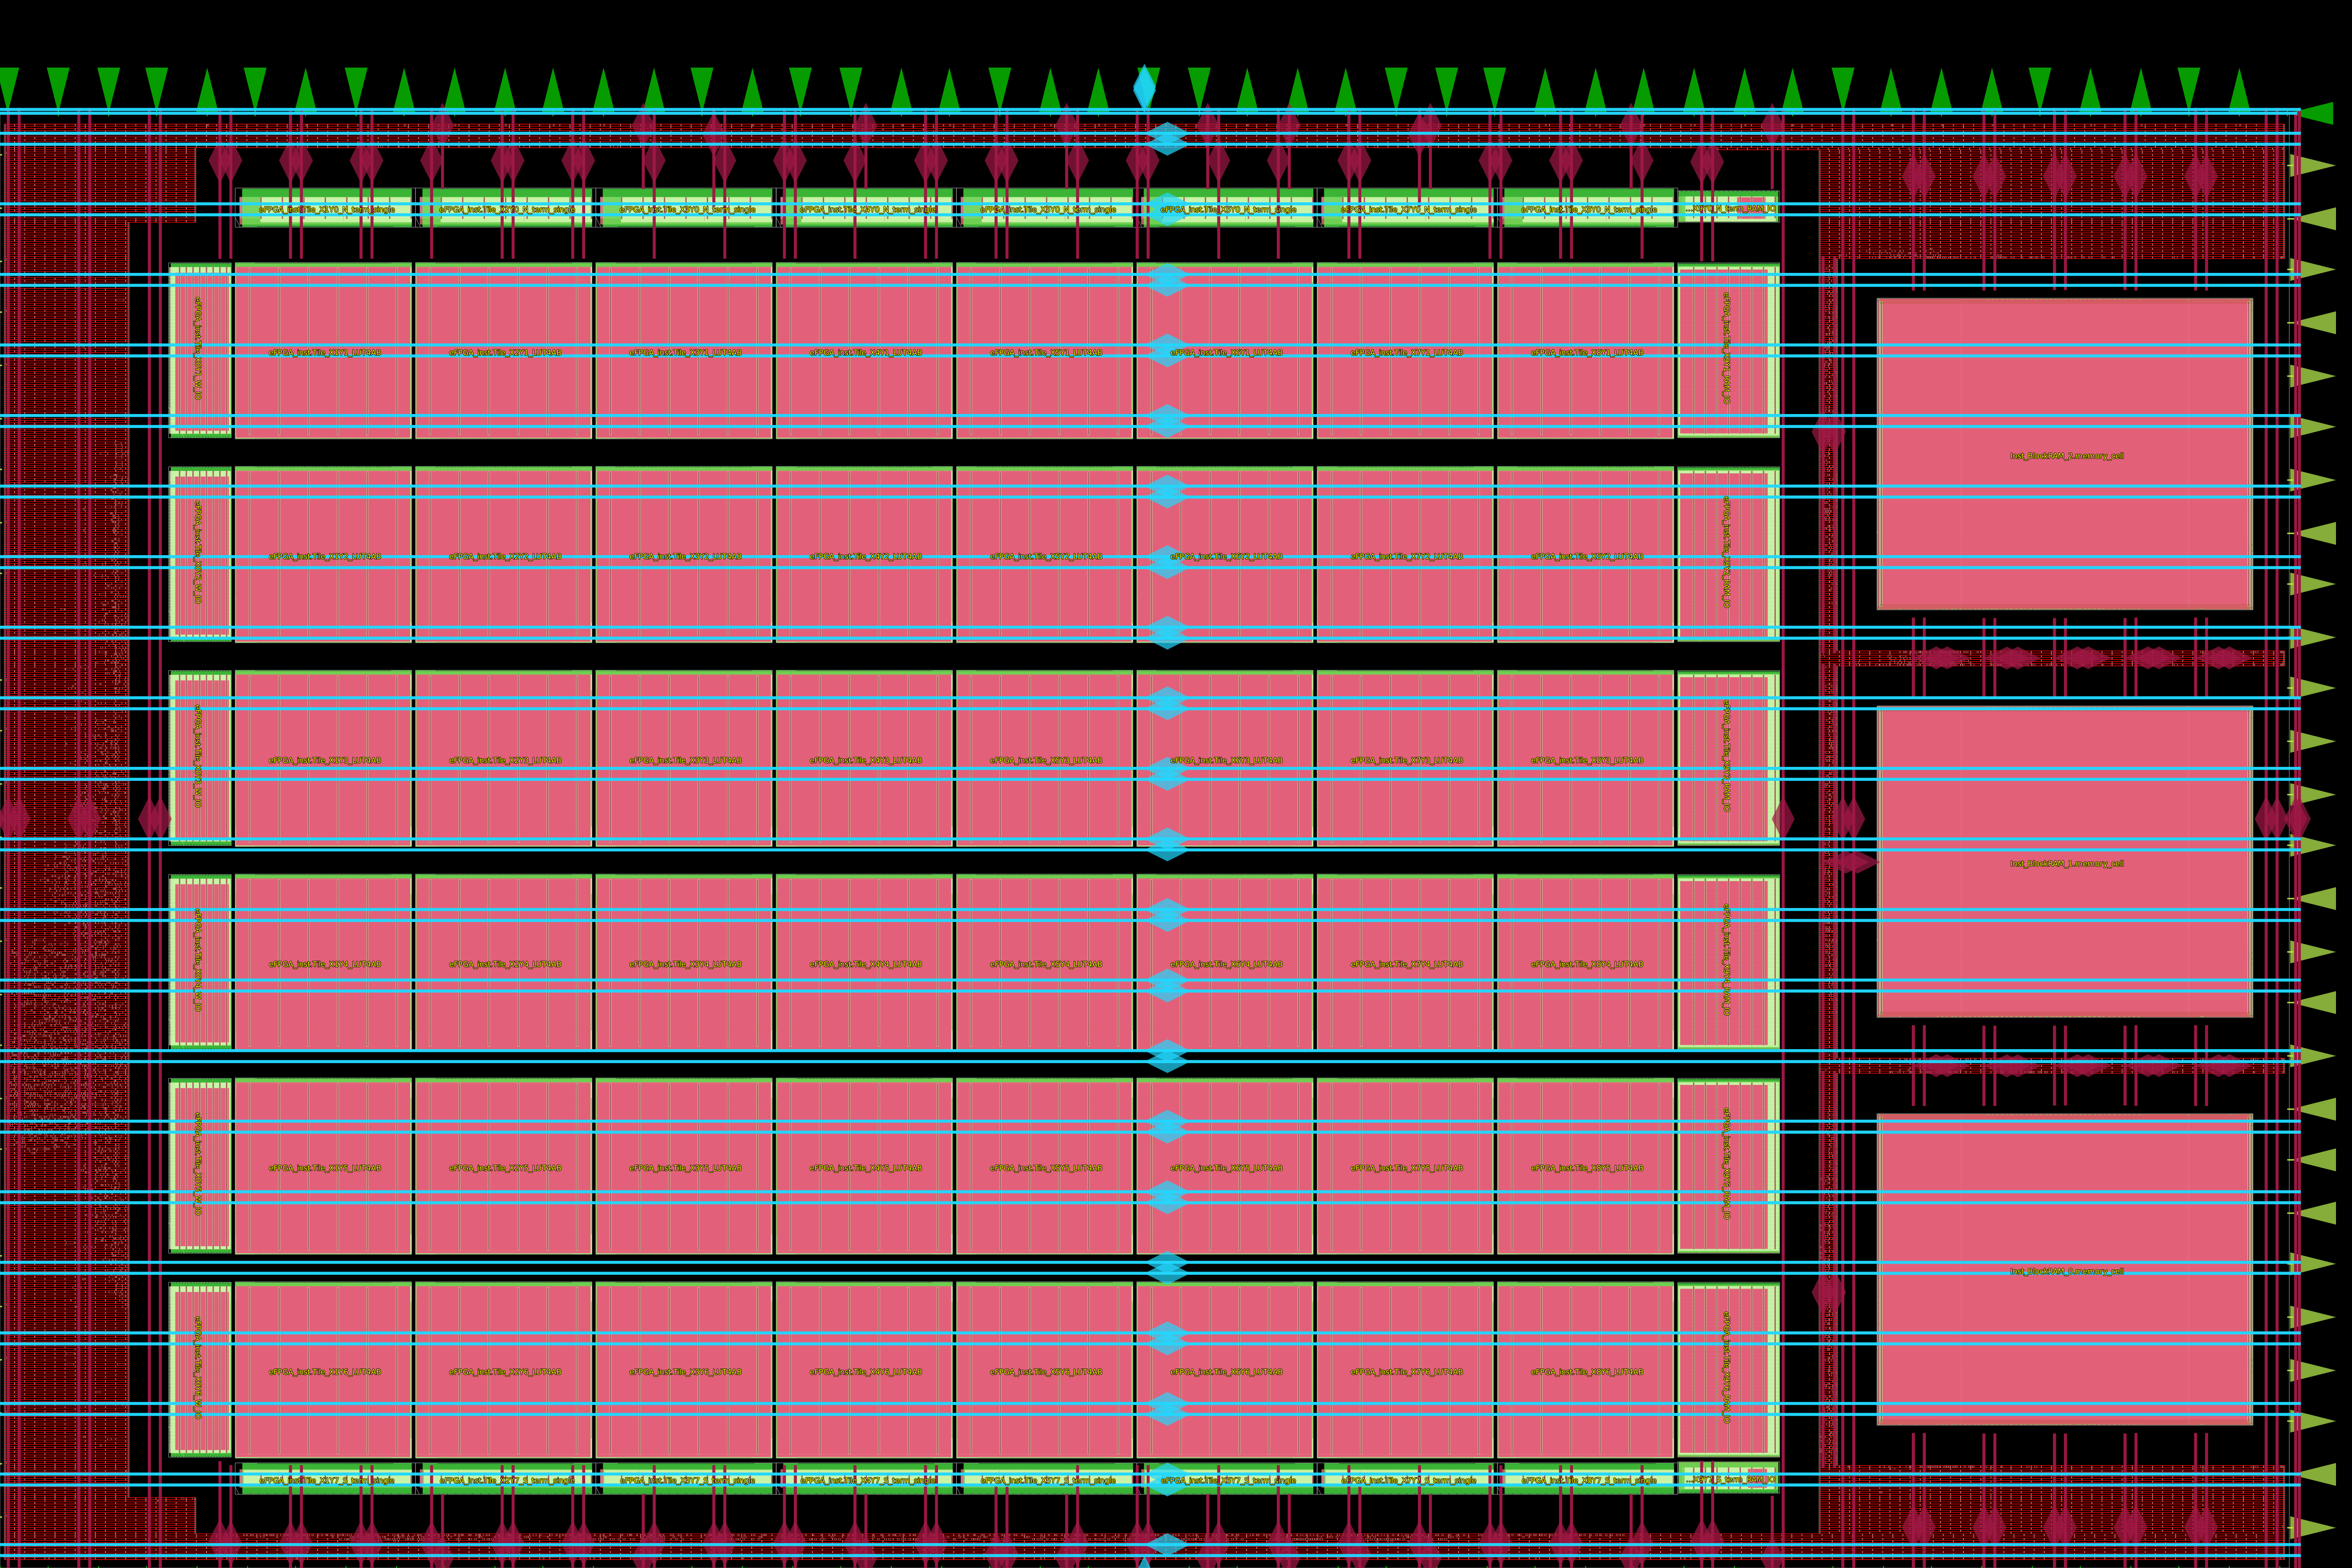

In [15]:
! echo -e "read_db 10-resizer.odb \n gui::save_image output.png  0 0 3000 2000 600 600 \n exit" \
> ./caravel_user_project/openlane/eFPGA_top/runs/eFPGA_top/tmp/placement/flcnv.tcl

! docker run --rm \
-v $(pwd):/workdir \
-v /home/$USER:/home/$USER \
-v /home/$USER/Programs/OpenLane:/openlane \
-v /home/$USER/Programs/OpenLane/empty:/openlane/install \
-v /home/$USER/.volare:/home/$USER/.volare \
-e PDK_ROOT=/home/$USER/.volare \
-e PDK=sky130A \
--user $(id -u):$(id -g) \
-e DISPLAY=:1.0 \
-v /tmp/.X11-unix:/tmp/.X11-unix \
-v /home/$USER/.Xauthority:/home/$USER/.Xauthority \
--network host \
--security-opt seccomp=unconfined \
efabless/openlane:3876562d27af3f6825a823941b1cab36f7eb6dc3-amd64 \
bash -c "cd /workdir/caravel_user_project/openlane/eFPGA_top/runs/eFPGA_top/tmp/placement && openroad flcnv.tcl"

qq = f"./caravel_user_project/openlane/eFPGA_top/runs/eFPGA_top/tmp/placement/output.png"

from IPython.display import Image, display

image_path = "output.png"
display(Image(filename=qq))

## Layout

The `.gds` file generated after running OpenLane contains the **physical layout**. The following code will list all layouts from the standard lib which are used in our design:
1. **Layers**:
   - **Metal layers** (e.g., `met1`, `met2`, etc.), our design has 5 metal layers
   - **Poly layers** 
   - **Diffusion layers** 
   - **Via layers** 
   - **Other layers**

2. **Standard Cell Placement**:
   - The locations of the standard cells within the core region, including their orientation and alignment.

3. **Interconnects**:
   - The routing of wires (interconnects) between cells, including power (VDD/VSS) and signal lines.

4. **Macros and Blocks**:
   - Our design contains **hard macros**, their physical placement, pin connections, and details are included.

5. **Power Delivery Network (PDN)**:
   - The power and ground grid is defined, including the metal layers and widths used.

6. **IO Pins**:
   - The locations and connections for input/output pins.

7. **Text Annotations**:
   - Names of cells, pins, and other metadata for reference.

8. **Fills and Decaps**:
   - Dummy metal fills, decoupling capacitors, or other structures.

Processing cell: sky130_fd_sc_hd__decap_3


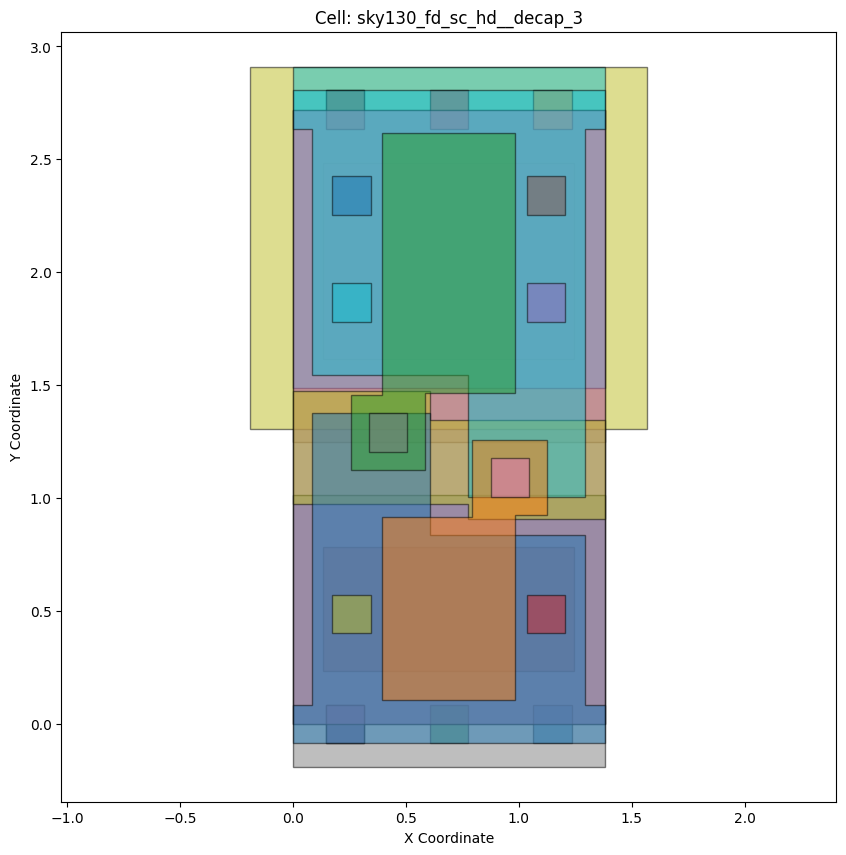

Processing cell: sky130_ef_sc_hd__decap_12


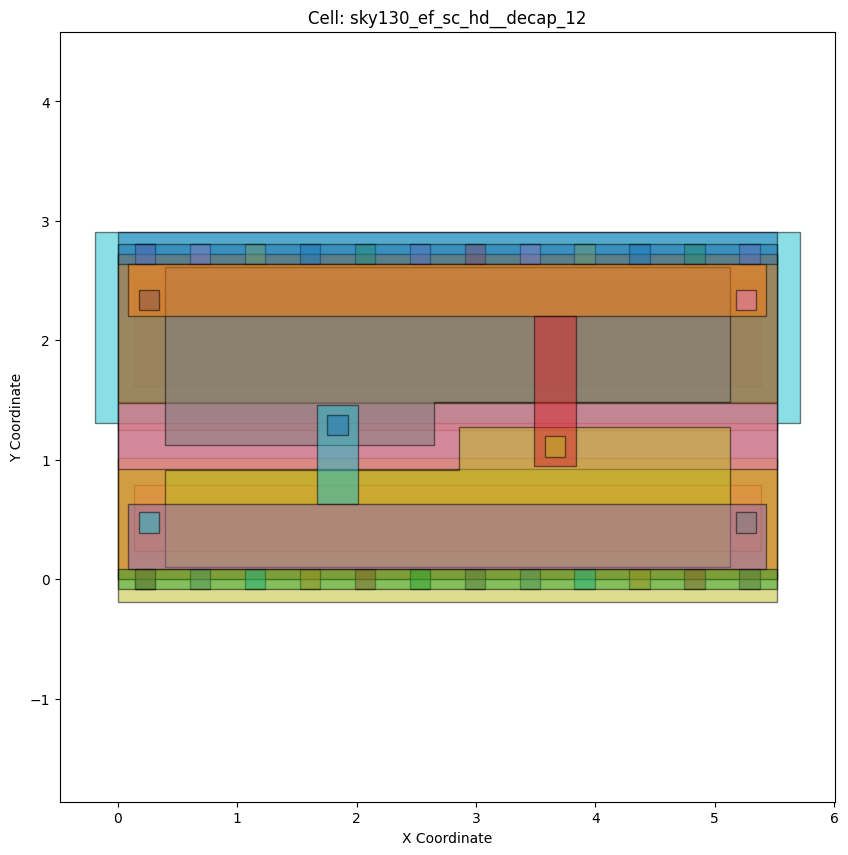

Processing cell: sky130_fd_sc_hd__tapvpwrvgnd_1


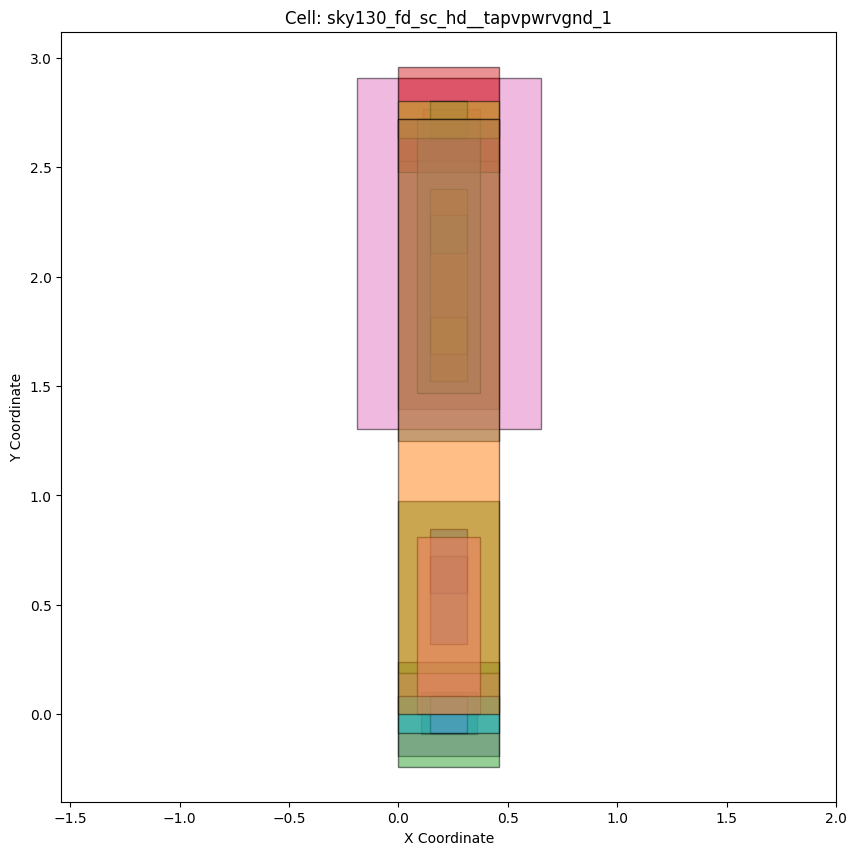

Processing cell: sky130_fd_sc_hd__fill_1


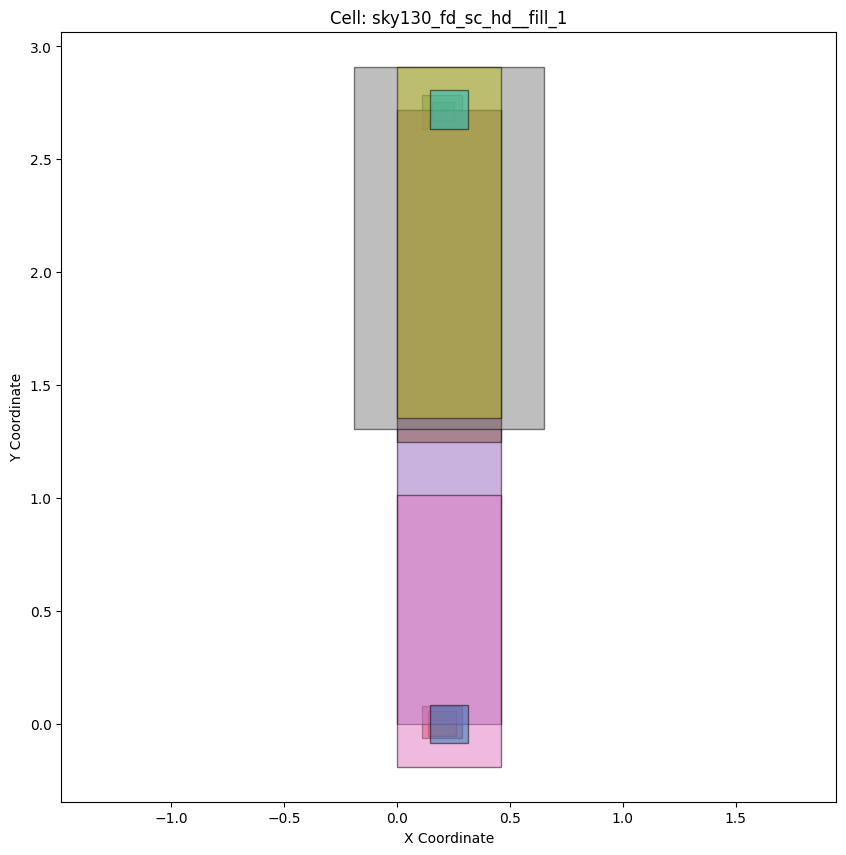

Processing cell: sky130_fd_sc_hd__decap_4


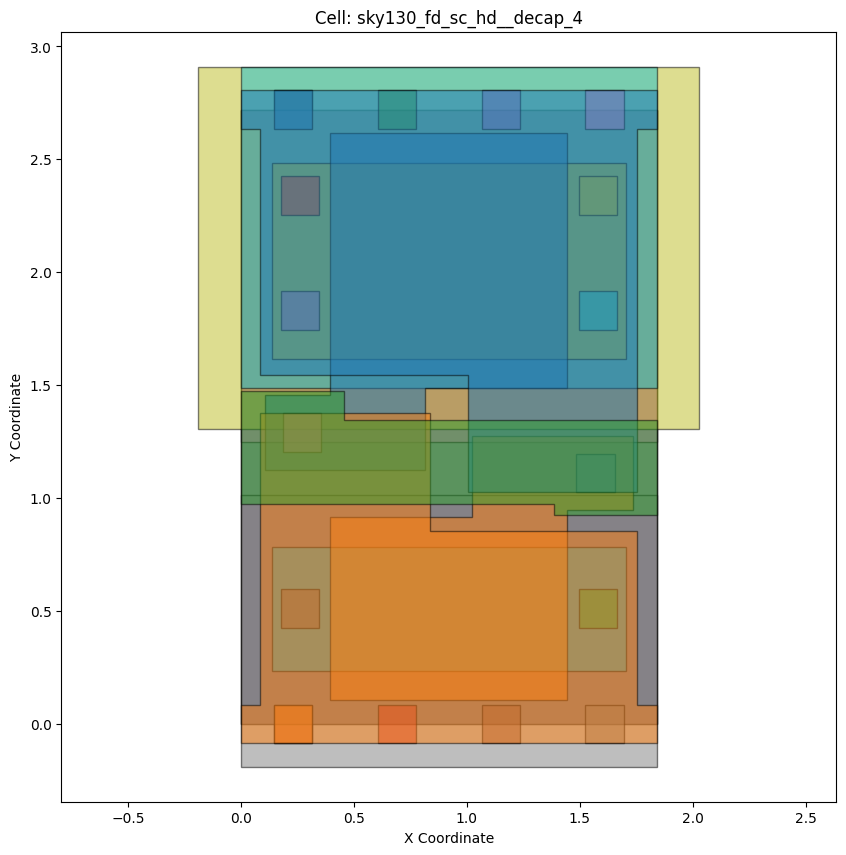

Processing cell: sky130_fd_sc_hd__decap_8


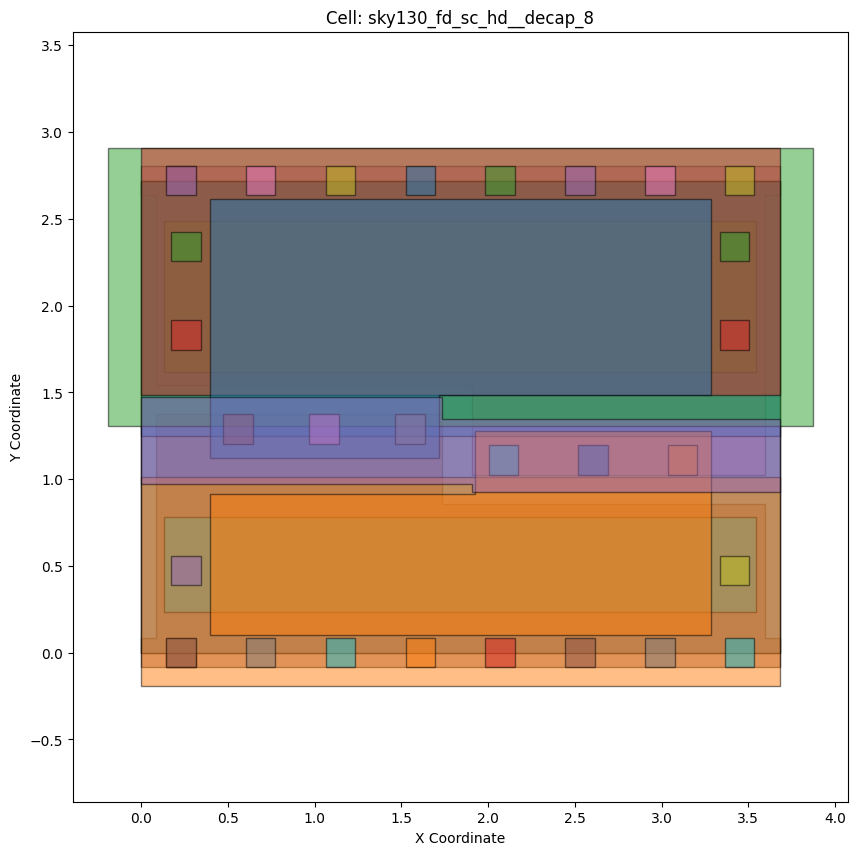

Processing cell: sky130_fd_sc_hd__decap_6


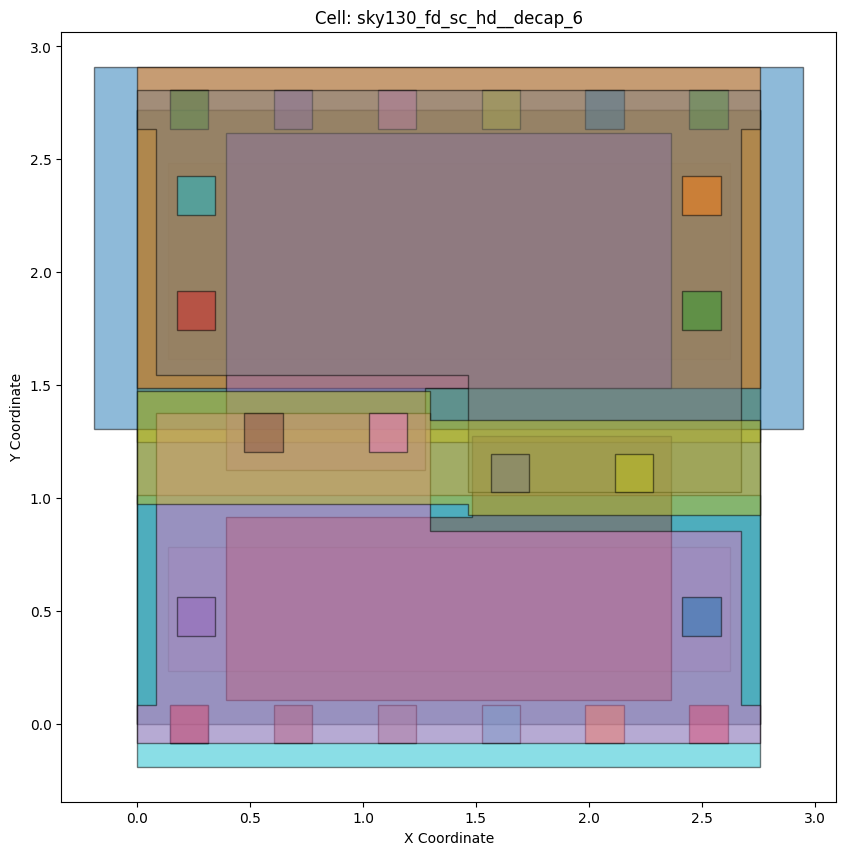

Processing cell: sky130_fd_sc_hd__clkbuf_1


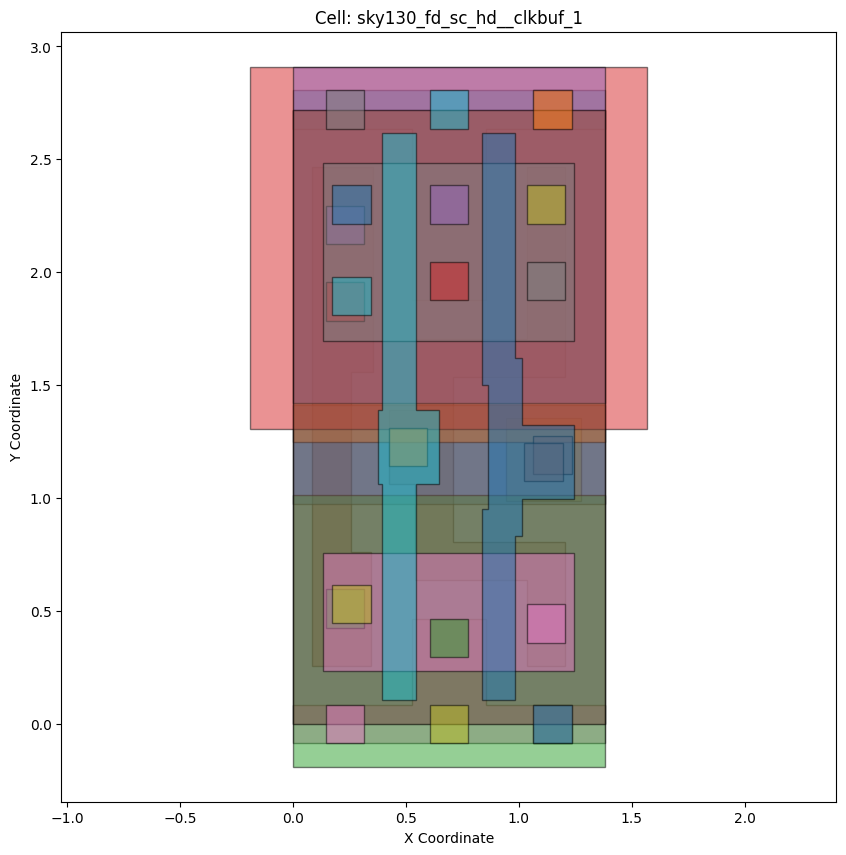

Processing cell: sky130_fd_sc_hd__fill_2


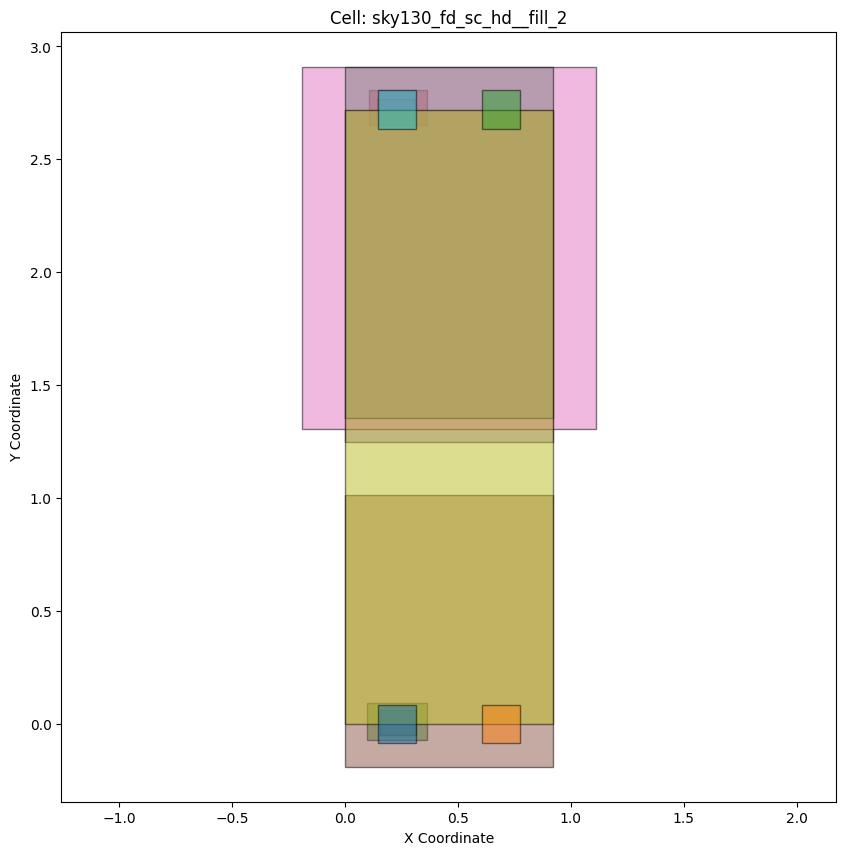

Processing cell: sky130_fd_sc_hd__dfrtp_4


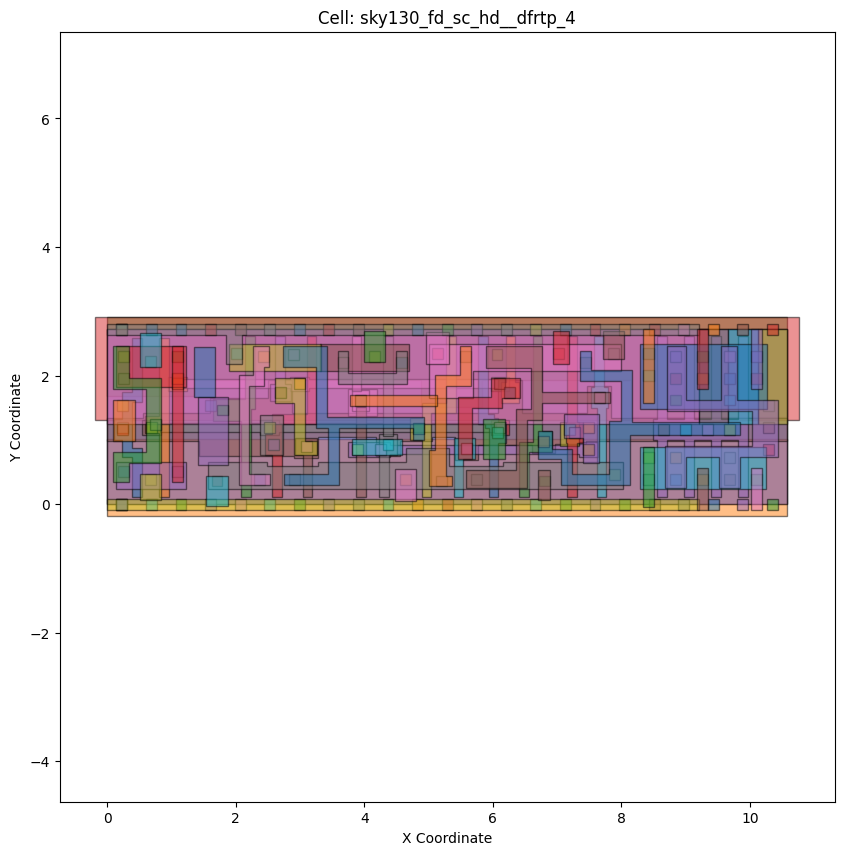

Processing cell: sky130_fd_sc_hd__clkbuf_16


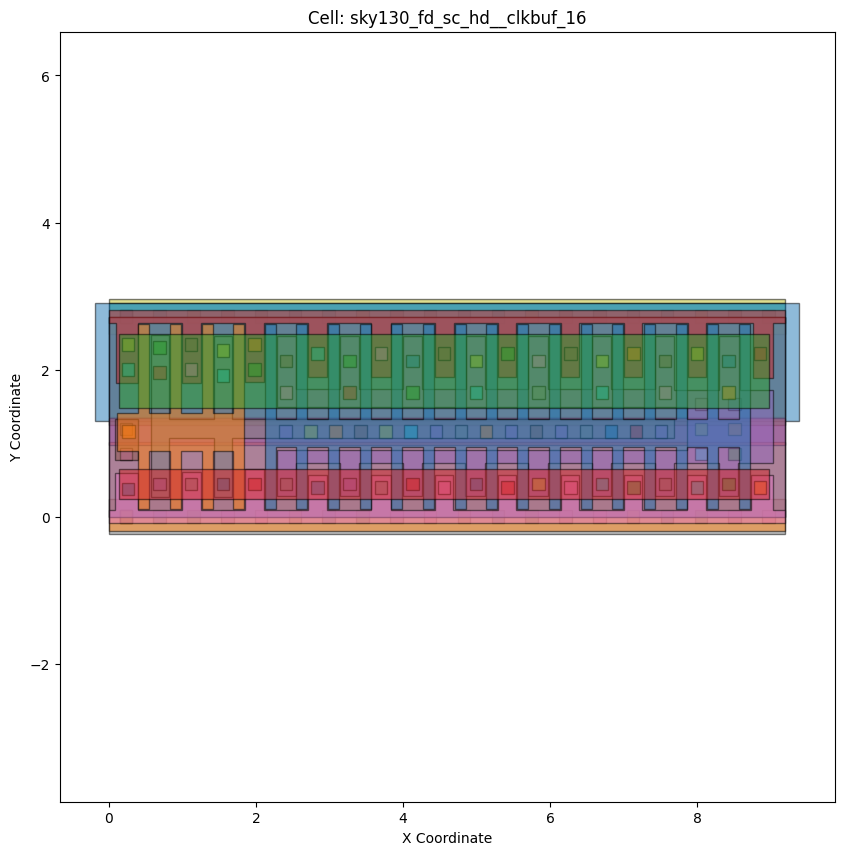

Processing cell: sky130_fd_sc_hd__nor2_4


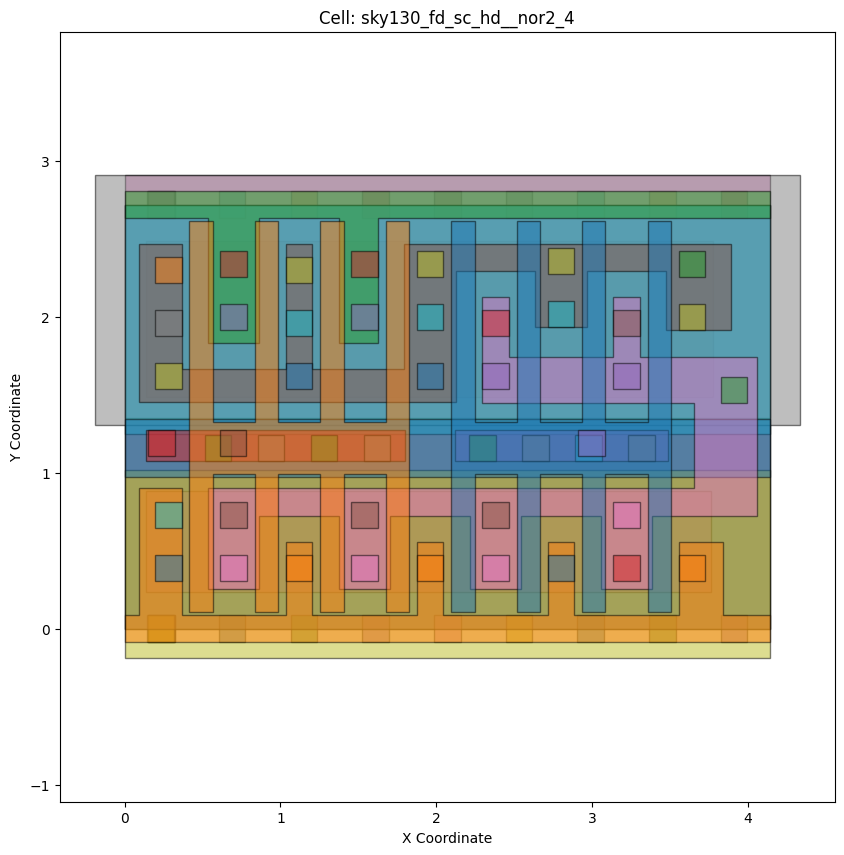

Processing cell: sky130_fd_sc_hd__inv_2


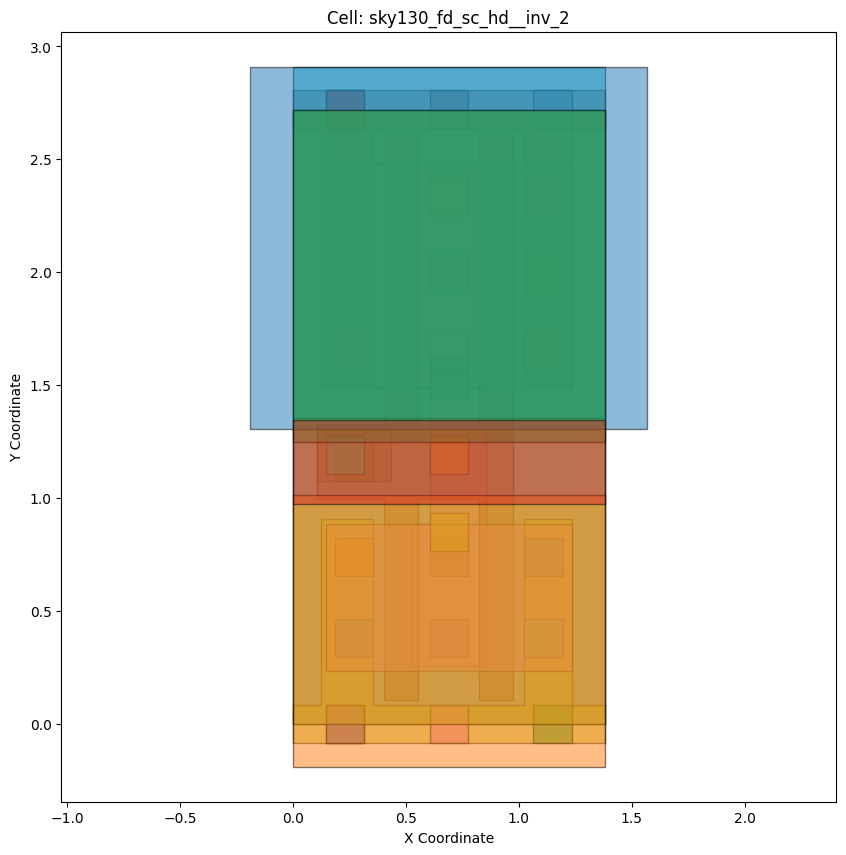

Processing cell: sky130_fd_sc_hd__and4b_4


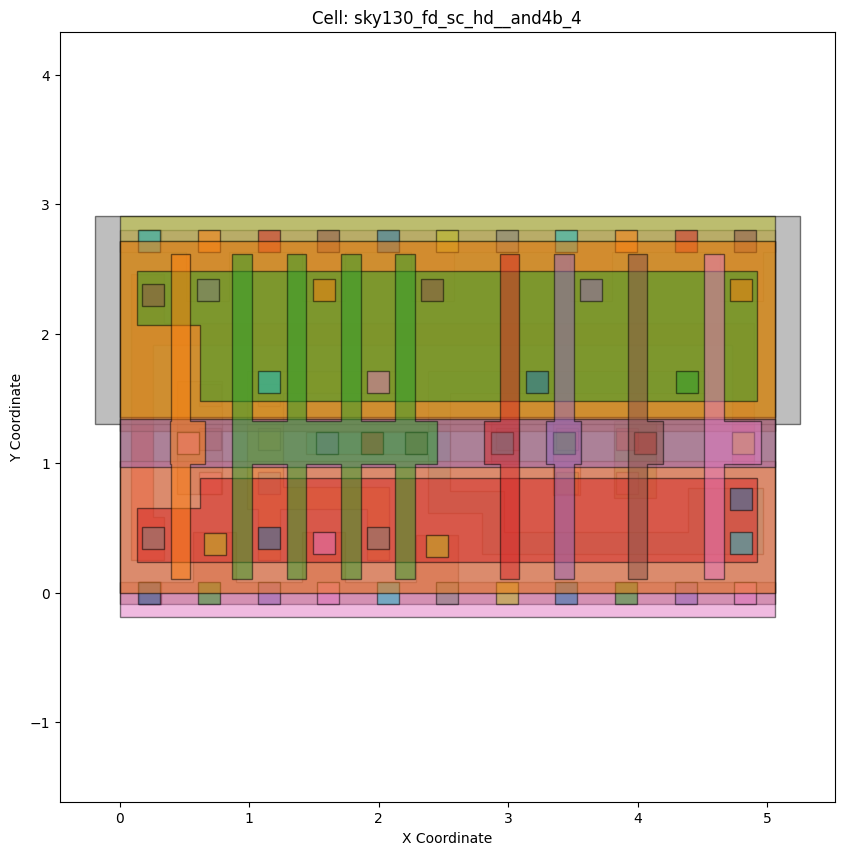

Processing cell: sky130_fd_sc_hd__clkbuf_2


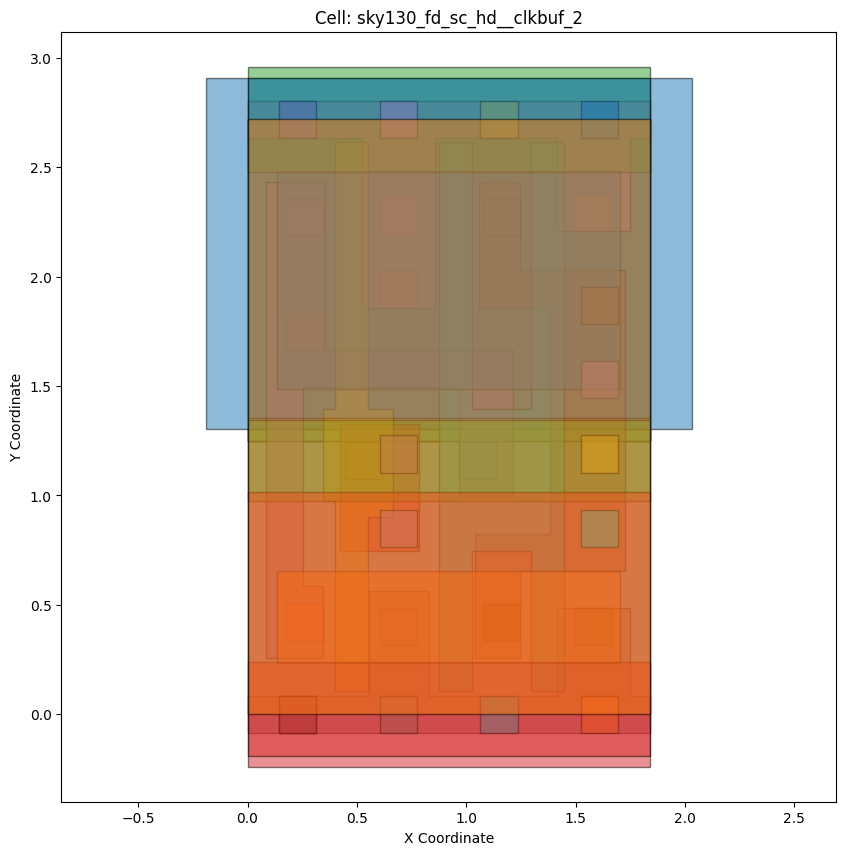

Processing cell: sky130_fd_sc_hd__or4bb_4


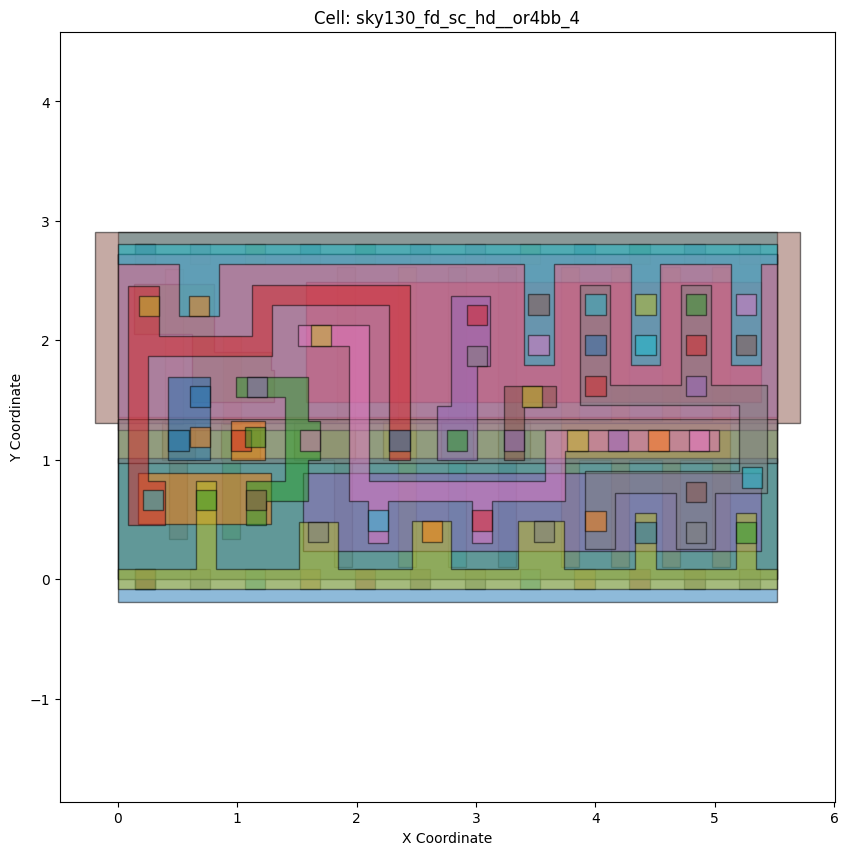

Processing cell: sky130_fd_sc_hd__or3b_4


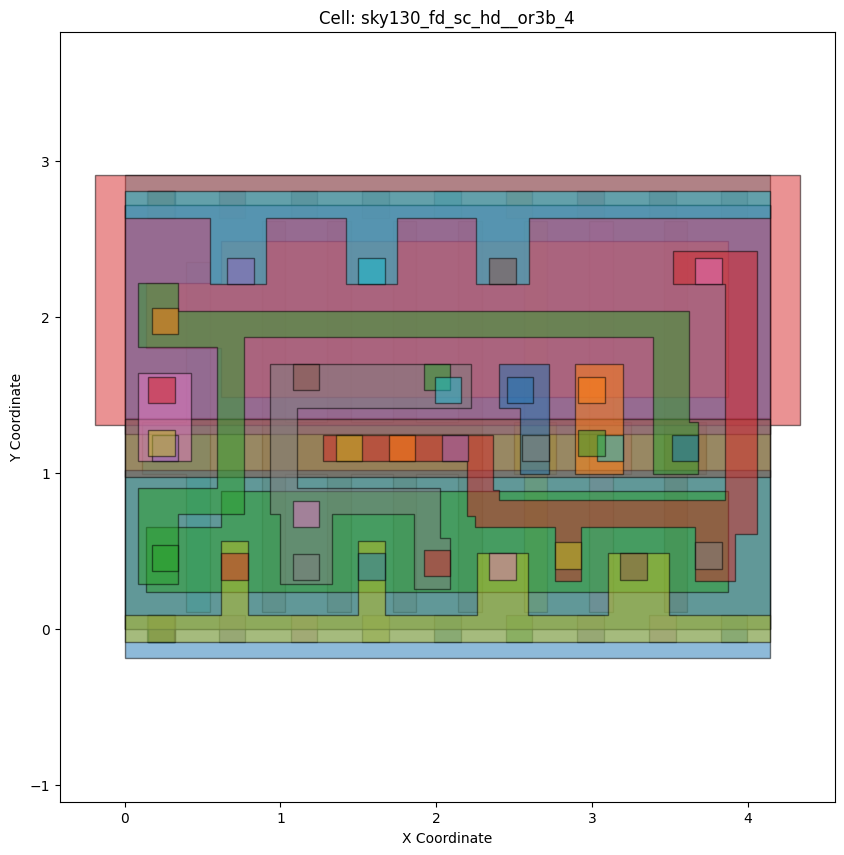

Processing cell: sky130_fd_sc_hd__xor2_4


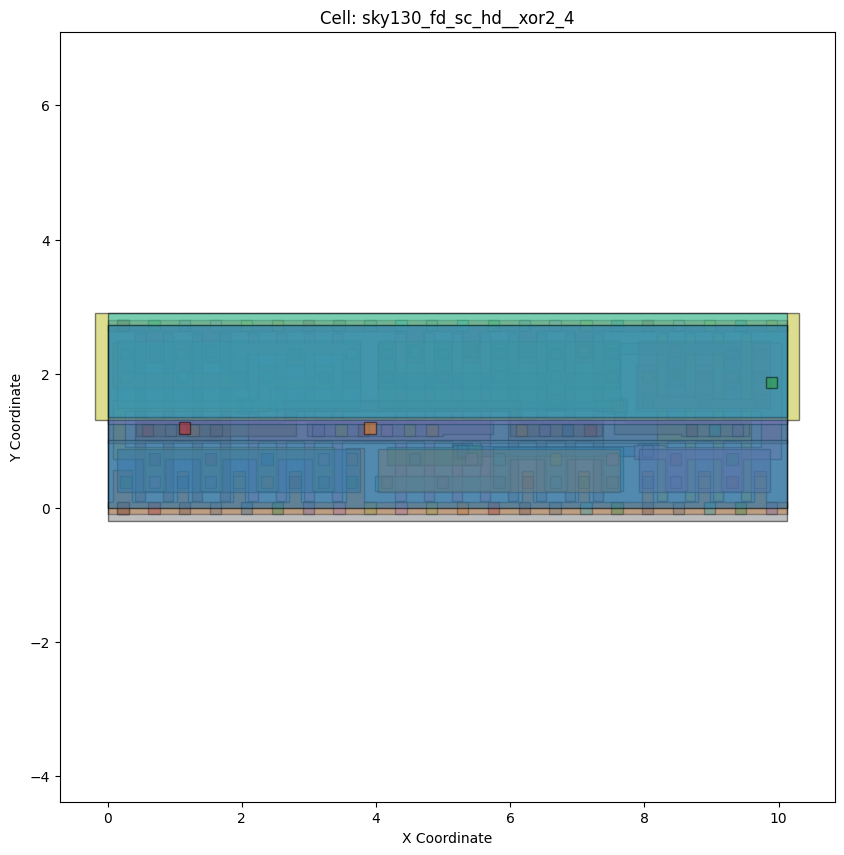

Processing cell: sky130_fd_sc_hd__buf_1


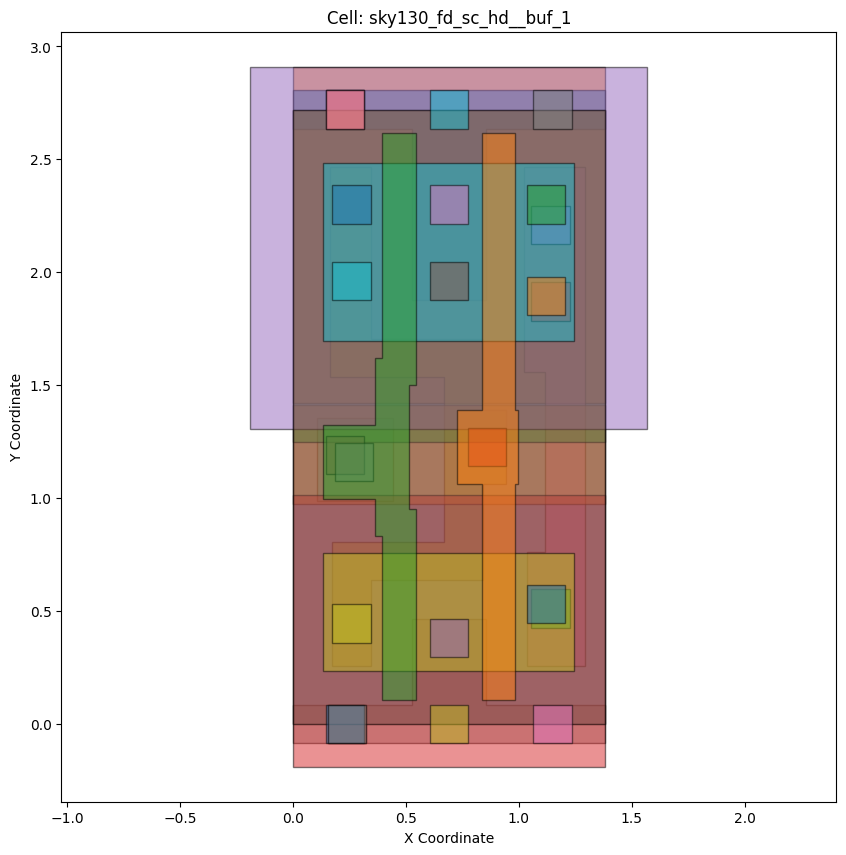

Processing cell: sky130_fd_sc_hd__dlygate4sd3_1


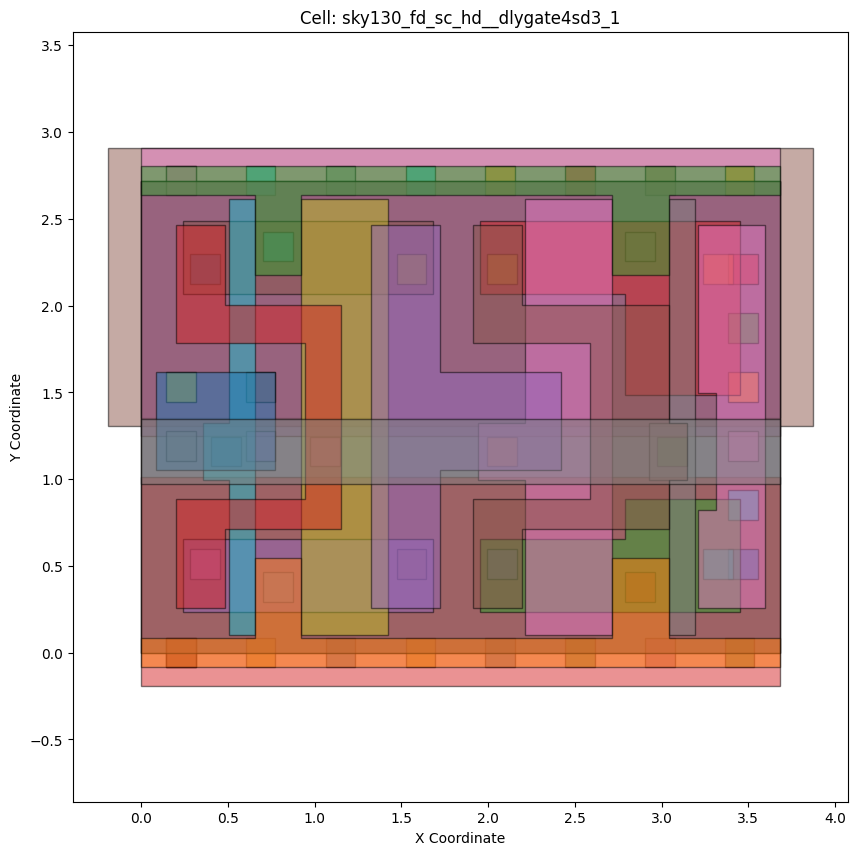

Processing cell: sky130_fd_sc_hd__buf_12


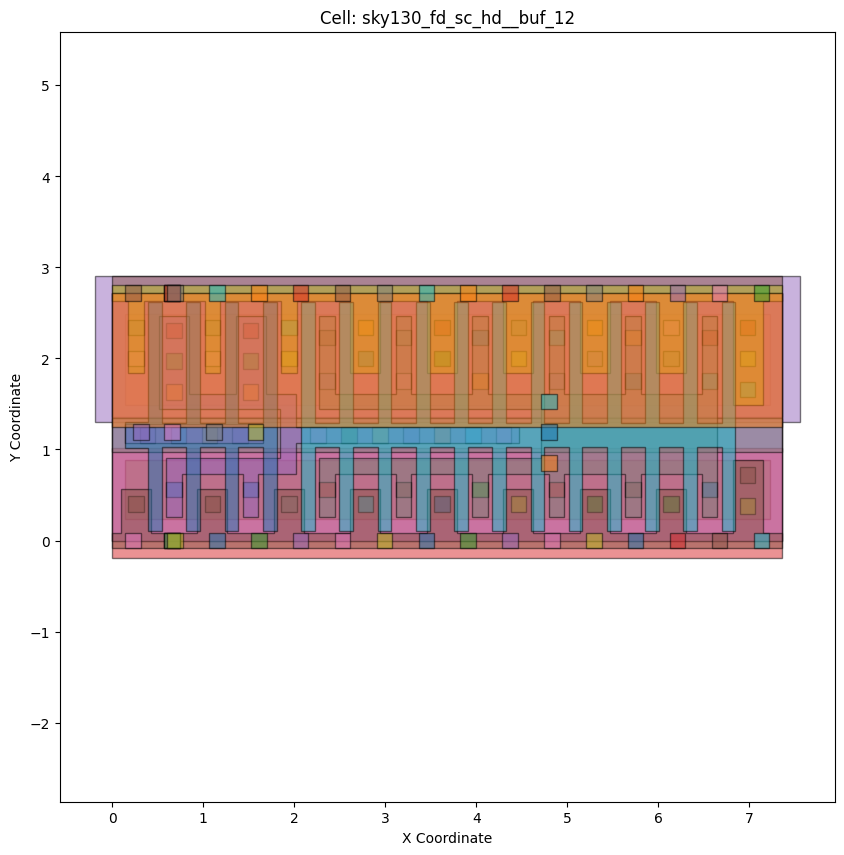

Processing cell: sky130_fd_sc_hd__buf_4


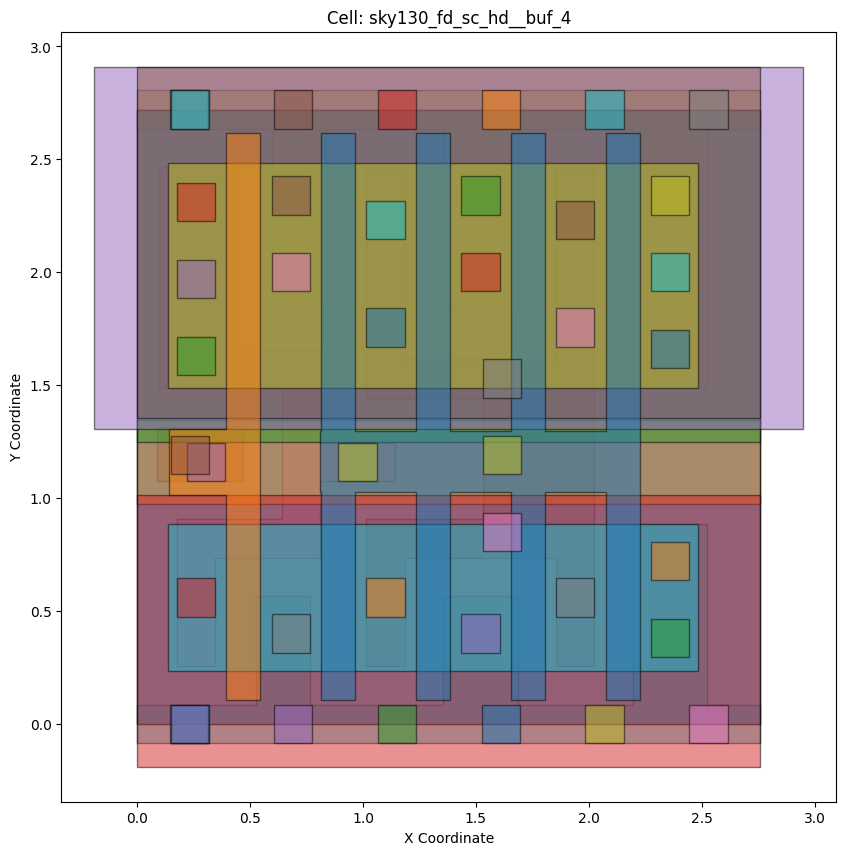

Processing cell: sky130_fd_sc_hd__dfxtp_2


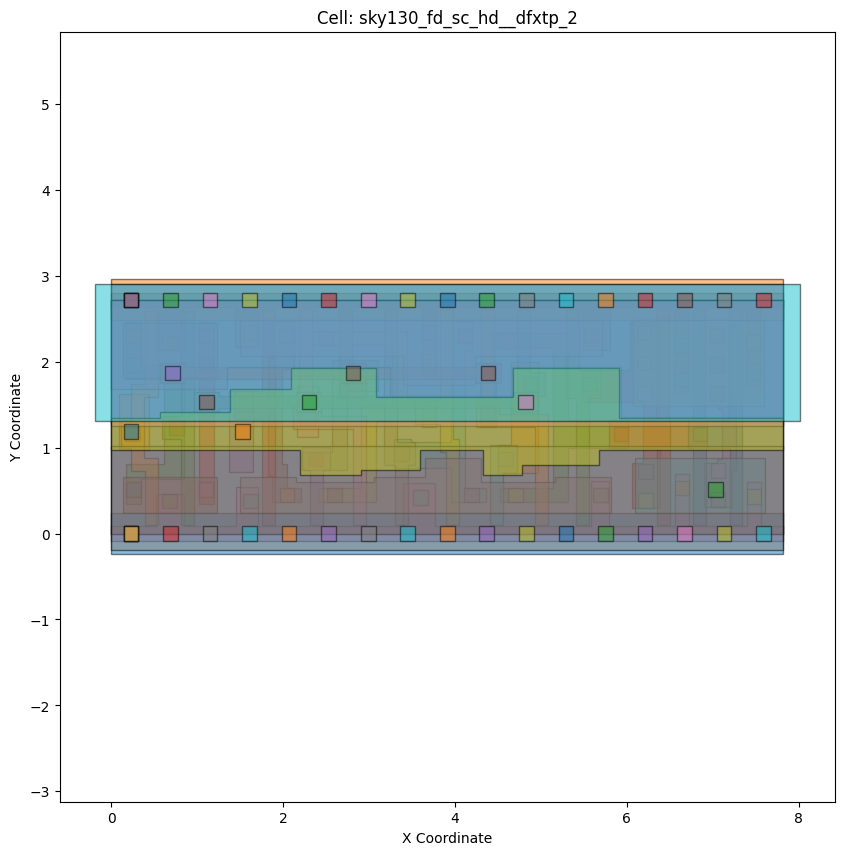

Processing cell: sky130_fd_sc_hd__and2_4


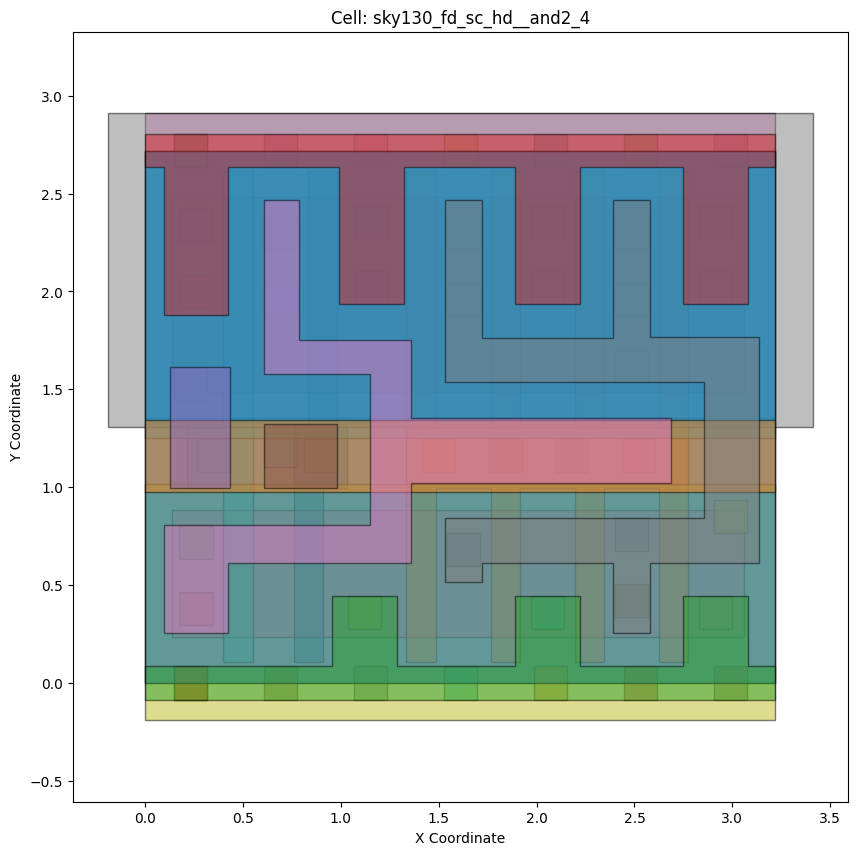

Processing cell: sky130_fd_sc_hd__mux2_4


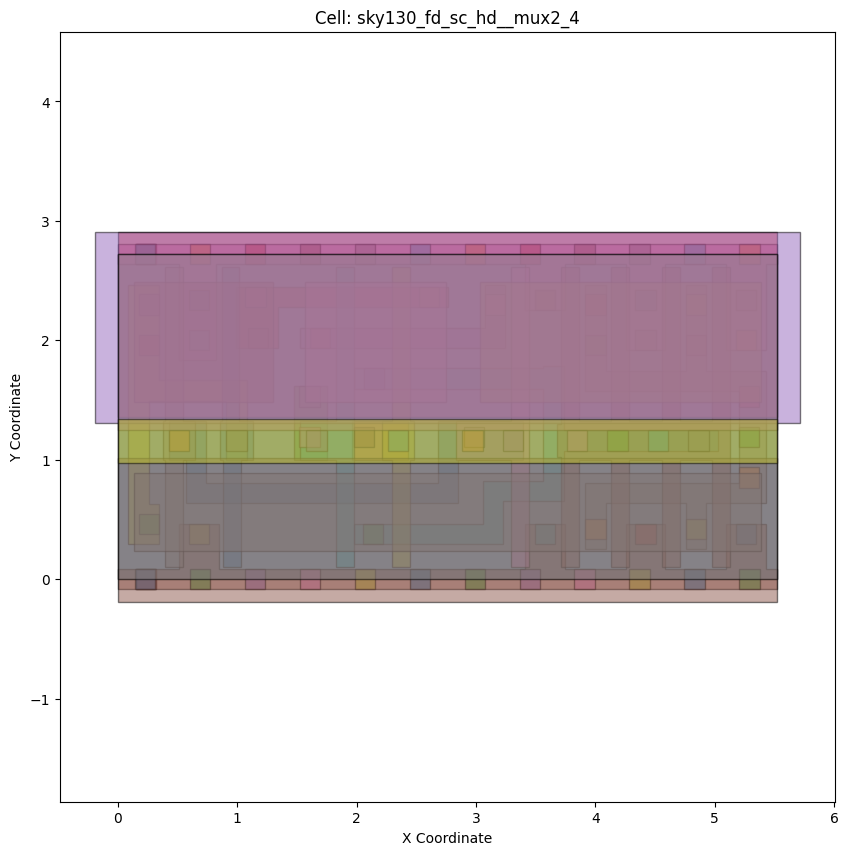

Processing cell: sky130_fd_sc_hd__mux2_2


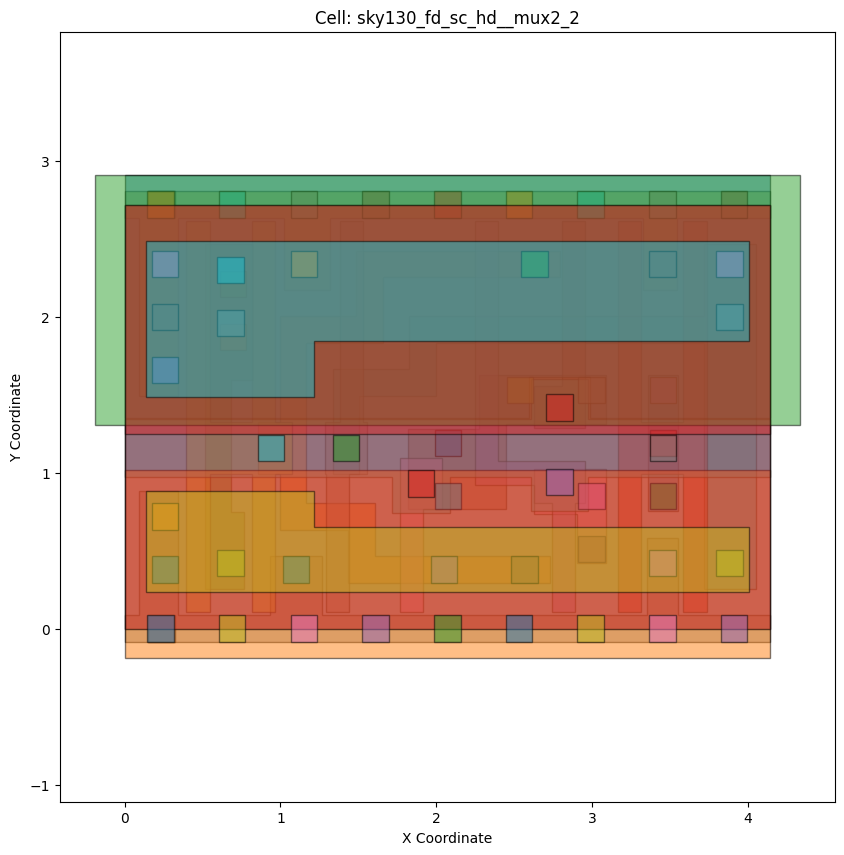

Processing cell: sky130_fd_sc_hd__mux2_1


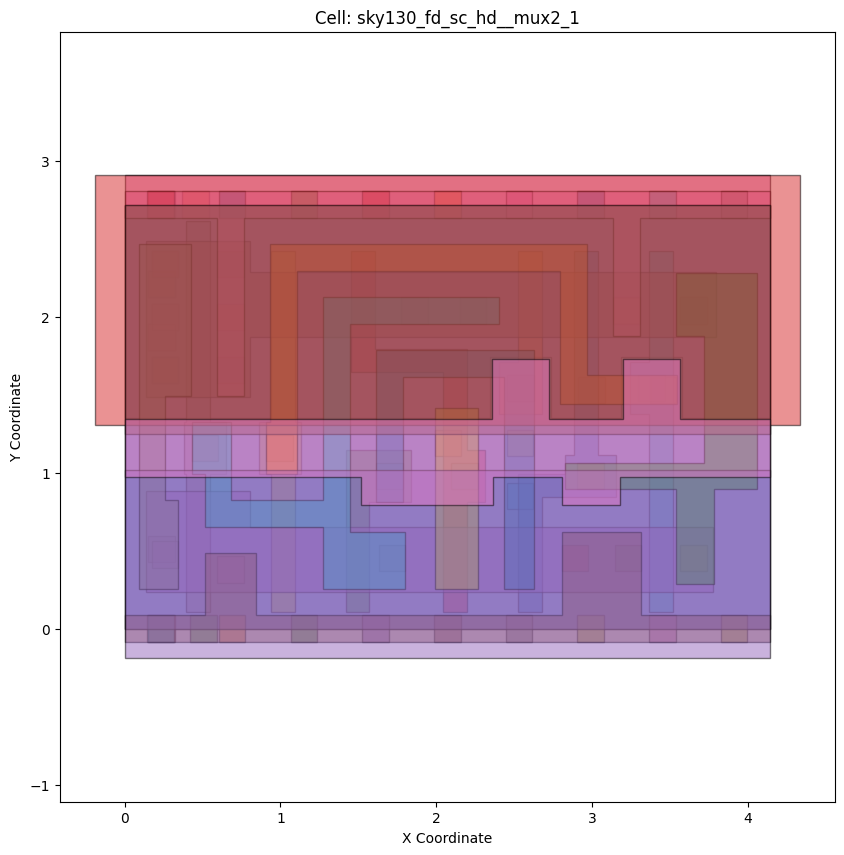

In [16]:
import gdstk
import IPython.display
import matplotlib.pyplot as plt
import numpy as np

rpath_gds = "./caravel_user_project/openlane/eFPGA_top/runs/eFPGA_top/results/signoff/eFPGA_top.gds"
rpath_svg = "./caravel_user_project/openlane/eFPGA_top/runs/eFPGA_top/results/signoff/eFPGA_top.magic.svg"

flrpln = gdstk.read_gds(rpath_gds)
flrpln_top_cell = flrpln.top_level()

for idx, cell in enumerate(flrpln_top_cell):
    print(f"Processing cell: {cell.name}")
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot each polygon in the cell
    for polygon in cell.polygons:
        points = np.array(polygon.points)  # polygon points
        x, y = points[:, 0], points[:, 1]  # x and y coordinates
        
        ax.fill(x, y, edgecolor='black', alpha=0.5)
    
    
    ax.set_title(f"Cell: {cell.name}")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.axis('equal')  # aspect ratio equal

    plt.show()
